#Proyek Machine Learning Recommender System - Muhammad Zainudin Damar Jati

## 1. Project Overview
Sistem rekomendasi telah menjadi komponen penting dalam banyak platform digital modern, termasuk dalam industri hiburan seperti streaming anime. Seiring pertumbuhan industri anime dan diversifikasi preferensi penonton, kebutuhan akan sistem yang dapat memberikan rekomendasi personalisasi semakin mendesak. Sistem rekomendasi memungkinkan pengguna untuk menemukan konten baru yang relevan berdasarkan preferensi mereka, sehingga meningkatkan keterlibatan pengguna dan durasi penggunaan platform.

Masalah ini penting diselesaikan karena jumlah anime yang sangat banyak bisa membuat pengguna kesulitan menentukan pilihan tontonan. Pendekatan tradisional seperti pencarian manual atau daftar populer tidak mampu memenuhi kebutuhan personalisasi pengguna secara optimal.

Berdasarkan studi oleh Bobadilla et al. (2013), sistem rekomendasi dapat dikategorikan menjadi Collaborative Filtering, Content-Based Filtering, dan Hybrid Systems, masing-masing dengan kelebihan dan keterbatasan tertentu \[1].

> \[1] J. Bobadilla, F. Ortega, A. Hernando, and A. Gutiérrez, “Recommender systems survey,” *Knowledge-Based Systems*, vol. 46, pp. 109–132, 2013.


## 2. Business Understanding

### Problem Statements

* Bagaimana memberikan rekomendasi anime yang relevan berdasarkan genre?
* Bagaimana memprediksi preferensi pengguna baru atau lama berdasarkan pola rating pengguna lain?

### Goals

* Menghasilkan daftar rekomendasi anime berdasarkan genre yang mirip dengan anime favorit pengguna.
* Memprediksi rating atau minat pengguna terhadap anime yang belum ditonton, berdasarkan perilaku kolektif pengguna lain.

### Solution Statements

* **Content-Based Filtering (CBF)** : Sistem rekomendasi berdasarkan kemiripan item. Fitur utama yang digunakan adalah genre anime. Pendekatan ini sangat efektif untuk pengguna baru (cold-start) karena hanya mengandalkan informasi item.
* **Neural Collaborative Filtering (NCF)** : Menggunakan pendekatan berbasis deep learning untuk mempelajari interaksi antara pengguna dan item. Model ini mampu menangkap hubungan non-linear yang kompleks dalam preferensi pengguna.


## 3. Data Understanding



### Import Library
Kode ini mengimpor berbagai pustaka (library) yang digunakan untuk pengolahan data, visualisasi, pembelajaran mesin, dan pembangunan model deep learning.

In [ ]:
import os
import pickle
import random
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import (
    BatchNormalization,
    Concatenate,
    Dense,
    Dropout,
    Embedding,
    Flatten,
    Input,
    LeakyReLU,
)
from tensorflow.keras.losses import Huber
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2



Library Sistem dan Utilitas
* `os` : Untuk operasi sistem file, seperti membaca atau menulis file dan direktori.
* `pickle` : Untuk menyimpan dan memuat objek Python secara efisien (serialisasi).
* `random` : Untuk operasi terkait bilangan acak.
* `zipfile` : Untuk membuka dan mengekstrak file arsip `.zip`.

Visualisasi
* `matplotlib.pyplot` : Library utama untuk membuat grafik dan plot.
* `seaborn` : Library berbasis matplotlib untuk visualisasi statistik yang lebih menarik dan mudah.

Manipulasi dan Analisis Data
* `numpy` : Library utama untuk operasi numerik dan array multidimensi.
* `pandas` : Library untuk manipulasi data berbasis tabel (DataFrame).

Google Colab Utilities
* `google.colab.files` : Modul khusus untuk mengupload dan mendownload file dalam lingkungan Google Colab.

Scikit-learn (sklearn) untuk Machine Learning
* `TfidfVectorizer` : Untuk mengubah teks menjadi fitur TF-IDF (untuk pengolahan teks).
* `mean_absolute_error`, `mean_squared_error` : Fungsi evaluasi error untuk model regresi.
* `cosine_similarity` : Menghitung kemiripan kosinus antar vektor.
* `train_test_split` : Membagi dataset menjadi data pelatihan dan pengujian.
* `LabelEncoder` : Mengubah label kategorikal menjadi angka.
* `MinMaxScaler` : Normalisasi fitur agar berada dalam rentang tertentu (misal 0–1).
* `shuffle` : Mengacak urutan data.

TensorFlow dan Keras untuk Deep Learning
* `tensorflow` : Framework utama untuk machine learning dan deep learning.
* `tensorflow.keras.callbacks` : Fungsi untuk menghentikan pelatihan lebih awal (EarlyStopping) dan mengatur learning rate saat pelatihan (ReduceLROnPlateau).
* `tensorflow.keras.layers` : Berbagai lapisan jaringan saraf (Dense, Embedding, Dropout, dll) yang digunakan untuk membangun model.
* `tensorflow.keras.losses.Huber` : Fungsi loss Huber, yang menggabungkan MSE dan MAE untuk regresi.
* `tensorflow.keras.models.Model` : API Keras untuk membuat model fungsional.
* `tensorflow.keras.optimizers.Adam` : Optimizer Adam untuk pembaruan bobot model.
* `tensorflow.keras.regularizers.l2` : Regularisasi L2 untuk mencegah overfitting.


### Load & Explore Data



Kode ini digunakan untuk mengunggah file dari komputer lokal ke Google Colab, lalu memeriksa setiap file yang diunggah; jika file tersebut berformat `.zip`, maka sistem akan secara otomatis membuat folder dengan nama yang sama (tanpa ekstensi `.zip`), kemudian mengekstrak seluruh isi file ZIP tersebut ke dalam folder tersebut menggunakan modul `zipfile`, serta menampilkan pesan konfirmasi bahwa proses ekstraksi berhasil, sementara jika file yang diunggah bukan file ZIP, maka akan ditampilkan pesan bahwa file tersebut tidak diproses.

In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    if filename.endswith(".zip"):
        zip_path = filename
        extract_dir = os.path.splitext(zip_path)[0]
        os.makedirs(extract_dir, exist_ok=True)

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"File '{zip_path}' berhasil diekstrak ke folder '{extract_dir}'")
    else:
        print(f"File '{filename}' bukan file ZIP")

Saving Anime Recommendations Database.zip to Anime Recommendations Database.zip
File 'Anime Recommendations Database.zip' berhasil diekstrak ke folder 'Anime Recommendations Database'


Kode ini dilakuakan pmembacaan dua file CSV bernama anime.csv dan rating.csv yang berada dalam folder bernama 'Anime Recommendations Database', lalu masing-masing file dimuat ke dalam objek DataFrame anime dan rating menggunakan fungsi read_csv dari library pandas, yang memungkinkan data dianalisis dan dimanipulasi dalam format tabel.

In [ ]:
data_dir = 'Anime Recommendations Database'
anime = pd.read_csv(f"{data_dir}/anime.csv")
rating = pd.read_csv(f"{data_dir}/rating.csv")

Kode ini menampilkan 5 baris pertama dari DataFrame `anime` untuk memberikan gambaran awal terhadap struktur dan isi data.

In [ ]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Kode ini menampilkan informasi struktur DataFrame `anime`, termasuk jumlah entri, nama kolom, jumlah nilai non-null, dan tipe data setiap kolom.

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Kode ini menghasilkan ringkasan statistik deskriptif untuk kolom numerik dalam DataFrame `anime`, seperti mean, standar deviasi, nilai minimum, maksimum, dan kuartil.

In [ ]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


Kode ini mengembalikan tuple yang menunjukkan dimensi DataFrame `anime`, yaitu jumlah baris dan kolom.

In [ ]:
anime.shape

(12294, 7)

Menampilkan 5 baris pertama dari DataFrame `rating` untuk melihat isi awal dataset.

In [ ]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Menampilkan informasi struktur DataFrame `rating`, termasuk jumlah baris, kolom, nilai non-null, dan tipe data.

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Memberikan statistik deskriptif untuk kolom numerik dalam DataFrame `rating` seperti rata-rata, nilai minimum, maksimum, dan distribusi kuartil.

In [ ]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


Mengembalikan jumlah baris dan kolom dalam DataFrame `rating` dalam bentuk tuple.

In [ ]:
rating.shape

(7813737, 3)

### Sampling

Mengambil sampel acak sebanyak 50.000 baris dari DataFrame `rating` untuk keperluan analisis atau pelatihan model, dengan `random_state=42` agar hasil acakan dapat direproduksi secara konsisten. Serta menampilkan 5 baris pertama dari DataFrame `rating_sample` untuk memverifikasi isi dari sampel acak yang telah diambil.

In [ ]:
rating_sample = rating.sample(n=50000, random_state=42)
rating_sample.head()

,user_id,anime_id,rating
7806172,73424,7785,10
6470262,59789,19769,6
5975474,55960,59,10
7617688,71461,3342,10
5932334,55390,986,8


### Visualisasi Data



#### Visualisasi Distribusi Rating Anime
Kode ini membuat histogram distribusi nilai rating pada dataset anime. Data rating yang kosong dihapus terlebih dahulu dengan `dropna()`. Histogram dibuat dengan 20 bins dan garis KDE (Kernel Density Estimation) untuk menunjukkan pola sebaran secara halus. Visualisasi ini membantu memahami seberapa sering nilai rating tertentu muncul.


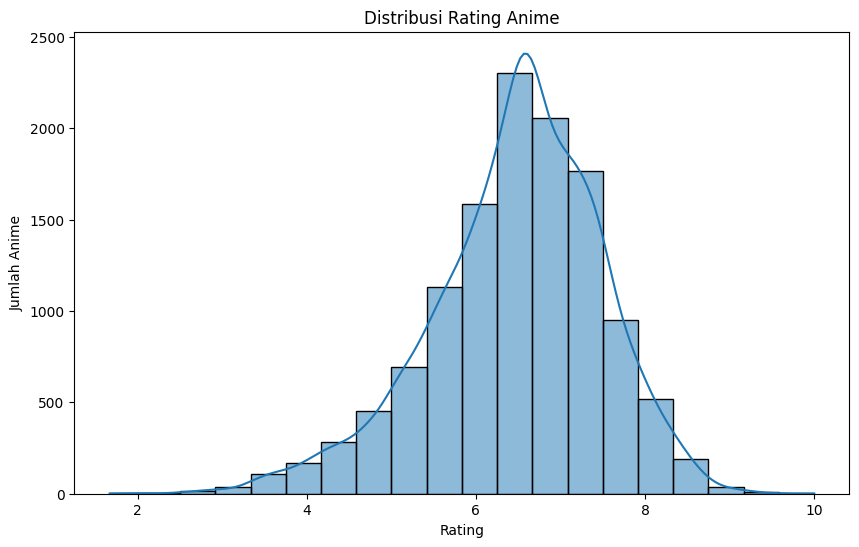

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(anime['rating'].dropna(), bins=20, kde=True)
plt.title('Distribusi Rating Anime')
plt.xlabel('Rating')
plt.ylabel('Jumlah Anime')
plt.show()

Visualisasi Distribusi Rating Anime ini menunjukkan distribusi rating anime berdasarkan data yang ada. Rating anime paling banyak berada di kisaran 6 hingga 7, yang terlihat dari batang histogram tertinggi pada rentang tersebut. Secara umum, bentuk distribusinya menyerupai lonceng (distribusi normal), yang berarti sebagian besar anime memiliki rating di tingkat menengah, sementara yang memiliki rating sangat rendah atau sangat tinggi jumlahnya lebih sedikit. Garis lengkung biru di atas histogram merupakan kurva KDE (Kernel Density Estimation) yang membantu memperjelas pola sebaran data secara halus. Visualisasi ini memberikan gambaran bahwa rating anime cenderung terpusat di nilai tengah dan jarang ada yang memiliki rating ekstrem.


#### Visualisasi 10 Anime dengan Jumlah Members Terbanyak
Kode ini menampilkan bar chart dari 10 anime terpopuler berdasarkan jumlah `members` (anggota yang menambahkan anime ke daftar mereka). Data diurutkan menurun dan dipilih 10 teratas. Visualisasi horizontal ini memudahkan membandingkan popularitas antar anime.


<ipython-input-26-213488df03b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_anime, x='members', y='name', palette='viridis')


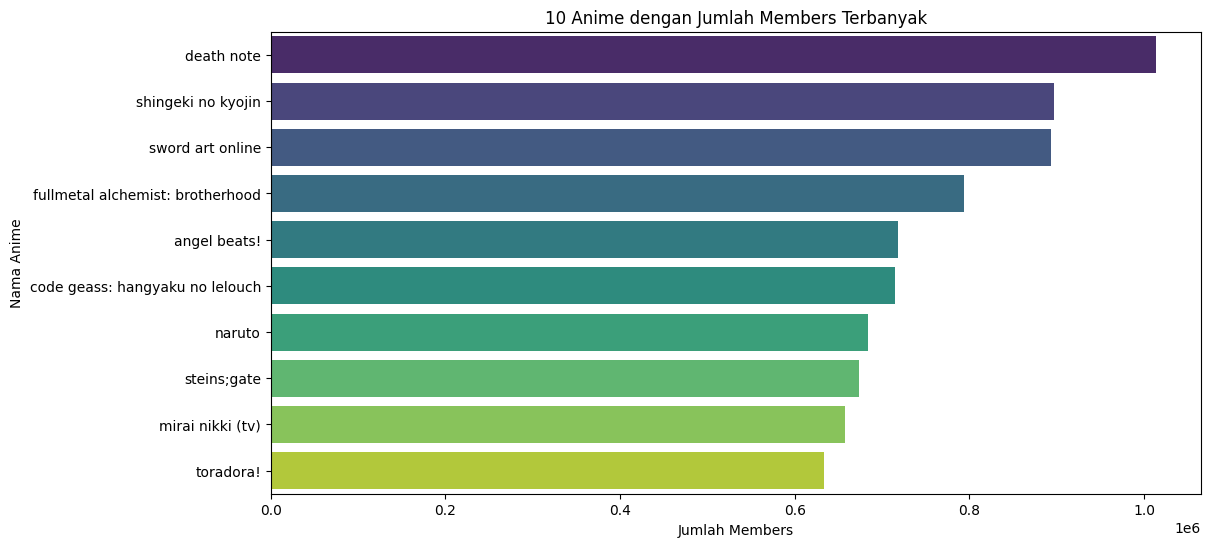

In [ ]:
top_anime = anime.sort_values(by='members', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_anime, x='members', y='name', palette='viridis')
plt.title('10 Anime dengan Jumlah Members Terbanyak')
plt.xlabel('Jumlah Members')
plt.ylabel('Nama Anime')
plt.show()

Visualisasi 10 Anime dengan Jumlah Members Terbanyak ini menunjukkan 10 anime dengan jumlah members terbanyak berdasarkan data yang tersedia. Pada sumbu horizontal (x) ditampilkan jumlah members, yaitu jumlah pengguna yang menambahkan anime tersebut ke daftar mereka (biasanya di platform seperti MyAnimeList). Sedangkan sumbu vertikal (y) menunjukkan nama-nama anime.

Anime dengan jumlah members terbanyak adalah "Death Note", diikuti oleh "Shingeki no Kyojin" dan "Sword Art Online". Ini menunjukkan bahwa anime-anime tersebut sangat populer dan memiliki banyak penggemar atau penonton yang tertarik untuk menontonnya atau sudah menontonnya.

Grafik ini menggunakan warna gradasi dari palet viridis, yang membantu membedakan tiap batang secara visual. Tampilan horizontal memudahkan pembacaan nama-nama anime yang relatif panjang.



#### Visualisasi Distribusi Rating oleh Pengguna
Kode ini membuat count plot (diagram batang) yang menunjukkan frekuensi masing-masing nilai rating yang diberikan oleh pengguna berdasarkan sampel 50.000 data. Grafik ini memberikan gambaran tentang kecenderungan pengguna dalam memberikan rating, misalnya apakah lebih sering memberi nilai tinggi atau rendah.


<ipython-input-27-8851bfad797d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rating_sample, x='rating', palette='magma')


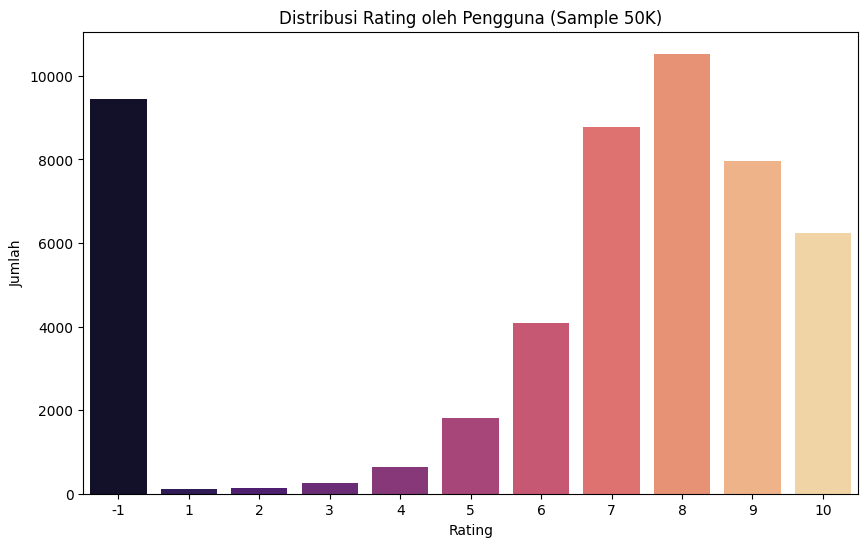

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=rating_sample, x='rating', palette='magma')
plt.title('Distribusi Rating oleh Pengguna (Sample 50K)')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

Visualisasi Distribusi Rating oleh Pengguna ini menunjukkan distribusi rating yang diberikan oleh pengguna terhadap anime berdasarkan sampel data sebanyak 50.000 entri. Sumbu horizontal (x) menunjukkan nilai rating (dari 1 hingga 10, dan ada satu nilai -1), sedangkan sumbu vertikal (y) menunjukkan jumlah pengguna yang memberikan rating tersebut.

Dari grafik terlihat bahwa:

* Rating 8 adalah yang paling sering diberikan oleh pengguna, diikuti oleh rating 7 dan 9, menandakan bahwa pengguna cenderung memberikan penilaian yang tinggi terhadap anime yang mereka tonton.
* Rating -1 juga memiliki frekuensi yang sangat tinggi. Biasanya nilai ini menunjukkan entri yang belum diberi rating secara eksplisit oleh pengguna dalam data mentah.
* Rating yang lebih rendah seperti 1 hingga 5 jarang diberikan, yang mengindikasikan bahwa pengguna cenderung tidak terlalu sering memberi penilaian buruk.



## 4. Data Preparation

### Data Cleaning



Menghapus data rating yang bernilai `-1`, karena dianggap sebagai rating tidak valid atau tidak tersedia.

In [ ]:
rating = rating[rating['rating'] != -1]

Mengisi nilai kosong (`NaN`) di kolom `genre` dan `type` dengan `'Unknown'`, sedangkan nilai kosong di kolom `rating` diisi dengan nilai median agar tetap representatif secara statistik.


In [ ]:
anime['genre'] = anime['genre'].fillna('Unknown')
anime['type'] = anime['type'].fillna('Unknown')
anime['rating'] = anime['rating'].fillna(anime['rating'].median())

Mengonversi kolom `episodes` menjadi numerik. Nilai tak valid diubah menjadi NaN (`errors='coerce'`), lalu diisi dengan median dan dikonversi menjadi integer untuk konsistensi.

In [ ]:
anime['episodes'] = pd.to_numeric(anime['episodes'], errors='coerce')
anime['episodes'] = anime['episodes'].fillna(anime['episodes'].median())
anime['episodes'] = anime['episodes'].astype(int)

Memastikan bahwa kolom `episodes` dan `rating` tidak memiliki nilai kosong setelah proses pembersihan. Jika ada, akan menimbulkan error.

In [ ]:
assert not anime[['episodes', 'rating']].isnull().any().any()

Menormalkan seluruh kolom teks dengan mengubah isinya menjadi huruf kecil dan menghapus spasi di awal/akhir, untuk konsistensi data.

In [ ]:
text_columns = anime.select_dtypes(include='object').columns
for col in text_columns:
    anime[col] = anime[col].str.lower().str.strip()

Menghilangkan spasi di sekitar koma pada kolom `genre`, agar setiap genre dapat dipisahkan dengan jelas sebagai token tunggal.

In [ ]:
anime['genre'] = anime['genre'].str.replace(r'\s*,\s*', ',', regex=True)

Membuang baris dengan genre `'unknown'` agar hanya anime dengan informasi genre yang valid digunakan untuk analisis lebih lanjut.

In [ ]:
anime_cleaned = anime[~anime['genre'].str.contains('unknown', na=False)].copy()

### Membuat Dataset untuk Sistem Rekomendasi

Membuat DataFrame baru khusus untuk sistem rekomendasi, hanya berisi ID, judul, dan genre, serta mengganti nama kolom agar lebih deskriptif dan konsisten.


In [ ]:
content_based = anime_cleaned[['anime_id', 'name', 'genre']].copy()
content_based.columns = ['anime_id', 'title', 'genres']

## 5. Modeling

### Content-Based Filtering (CBF)



#### TF-IDF Vectorization untuk Genre
Kode ini mengubah data genre menjadi vektor numerik menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency). Token dipisahkan berdasarkan koma, sehingga setiap genre diperlakukan sebagai kata unik. Hasilnya adalah `tfidf_matrix`, representasi vektor dari genre tiap anime.

In [ ]:
tfidf = TfidfVectorizer(token_pattern=r'[^,]+')
tfidf_matrix = tfidf.fit_transform(content_based['genres'])

#### Menghitung Cosine Similarity antar Anime

Menghitung **cosine similarity** antar anime berdasarkan genre yang telah diubah ke bentuk vektor TF-IDF. Hasilnya adalah matriks kesamaan, di mana setiap nilai merepresentasikan kemiripan antara dua anime.



In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

#### Fungsi Rekomendasi Anime Berbasis Konten
Fungsi ini memberikan rekomendasi anime berdasarkan **kemiripan genre**.
Langkah-langkahnya:

* Mencari anime berdasarkan judul input (dikonversi ke huruf kecil dan di-trim).
* Jika tidak ditemukan, kembalikan `top_n` anime secara acak.
* Jika ditemukan, ambil indeks anime tersebut, lalu cari anime lain dengan nilai cosine similarity tertinggi.
* Mengembalikan `top_n` anime paling mirip beserta skornya.


In [ ]:
def recommend_anime_content_based(title, top_n=5):
    title_lower = title.lower().strip()
    matched = content_based[content_based['title'].str.lower().str.strip() == title_lower]

    if matched.empty:
        fallback = content_based['title'].sample(top_n, random_state=42).tolist()
        return f"Anime '{title}' tidak ditemukan. Mungkin kamu tertarik dengan: {fallback}"

    idx = matched.index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    results = content_based.iloc[indices].copy()
    results['similarity_score'] = similarity_scores

    return results[['title', 'genres', 'similarity_score']].sort_values(by='similarity_score', ascending=False)

#### Menampilkan Hasil Rekomendasi untuk "Naruto"
Memanggil fungsi rekomendasi dan mencetak anime yang paling mirip dengan "Naruto" berdasarkan genre-nya. Jika "Naruto" tidak ditemukan, akan ditampilkan rekomendasi acak.

In [ ]:
print(recommend_anime_content_based("Naruto"))

                                                  title  \
615                                  naruto: shippuuden   
841                                              naruto   
1103  boruto: naruto the movie - naruto ga hokage ni...   
1343                                        naruto x ut   
1472        naruto: shippuuden movie 4 - the lost tower   

                                              genres  similarity_score  
615   action,comedy,martial arts,shounen,super power               1.0  
841   action,comedy,martial arts,shounen,super power               1.0  
1103  action,comedy,martial arts,shounen,super power               1.0  
1343  action,comedy,martial arts,shounen,super power               1.0  
1472  action,comedy,martial arts,shounen,super power               1.0  


### Collaborative Filtering Preparation


#### Encoding ID Pengguna dan Anime
Kode ini melakukan encoding terhadap ID pengguna dan ID anime menjadi indeks numerik. Tujuannya adalah untuk memudahkan input ke model machine learning. Juga dibuat peta balik (`encoded_to_user` dan `encoded_to_anime`) agar prediksi dapat dikonversi kembali ke ID asli.


In [ ]:
user_ids = rating['user_id'].unique()
anime_ids = rating['anime_id'].unique()

user_to_encoded = {uid: i for i, uid in enumerate(user_ids)}
anime_to_encoded = {aid: i for i, aid in enumerate(anime_ids)}
encoded_to_user = {i: uid for uid, i in user_to_encoded.items()}
encoded_to_anime = {i: aid for aid, i in anime_to_encoded.items()}

#### Menambahkan Kolom Encode ke Dataset
Menambahkan kolom `user` dan `anime` ke dataset `rating` dengan nilai yang telah diencode agar dapat digunakan sebagai fitur input ke model.


In [ ]:
rating['user'] = rating['user_id'].map(user_to_encoded)
rating['anime'] = rating['anime_id'].map(anime_to_encoded)

#### Normalisasi rating ke [0, 1]
Melakukan **normalisasi** nilai rating ke rentang \[0, 1] untuk meningkatkan stabilitas pelatihan model. Jika semua rating bernilai sama, proses akan dihentikan karena normalisasi tidak bermakna. Kemudian, `x` berisi fitur (user, anime) dan `y` berisi target rating.


In [ ]:
min_rating = rating['rating'].min()
max_rating = rating['rating'].max()

if max_rating == min_rating:
    raise ValueError("Seluruh rating memiliki nilai yang sama, tidak bisa dinormalisasi.")

y = rating['rating'].apply(lambda r: (r - min_rating) / (max_rating - min_rating)).values
x = rating[['user', 'anime']].values

#### Mengacak Data
Mengacak urutan data untuk memastikan distribusi train/val tidak bias terhadap urutan awal dataset.

In [ ]:
x, y = shuffle(x, y, random_state=42)

#### Membagi Data Training dan Validasi
Membagi data menjadi 80% untuk pelatihan dan 20% untuk validasi, guna menghindari overfitting dan menilai performa model secara objektif.

In [ ]:
train_size = int(0.8 * len(x))
x_train, x_val = x[:train_size], x[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

#### Menyimpan Mapping ke File
Menyimpan dictionary mapping ID pengguna dan anime ke dalam file `.pkl` menggunakan `pickle`, agar dapat digunakan kembali saat prediksi atau inference dilakukan tanpa perlu mengulang proses encoding.

In [ ]:
mappings = {
    'user_to_encoded.pkl': user_to_encoded,
    'anime_to_encoded.pkl': anime_to_encoded,
    'encoded_to_user.pkl': encoded_to_user,
    'encoded_to_anime.pkl': encoded_to_anime
}

for filename, mapping in mappings.items():
    with open(filename, 'wb') as f:
        pickle.dump(mapping, f)

#### Menampilkan Statistik Data
Menampilkan informasi penting: jumlah total data interaksi, pembagian train/val, serta jumlah unik pengguna dan anime. Berguna untuk validasi awal sebelum proses modeling dilanjutkan.

In [ ]:
print(f"Total data: {len(x)}")
print(f"Train: {len(x_train)}, Validation: {len(x_val)}")
print(f"Unique users: {len(user_ids)}, Unique anime: {len(anime_ids)}")

Total data: 6337241
Train: 5069792, Validation: 1267449
Unique users: 69600, Unique anime: 9927



###Neural Collaborative Filtering (NCF)



#### Set Random Seed
Kode ini memastikan **reproducibility** atau hasil yang konsisten dalam setiap eksekusi dengan mengatur seed acak untuk `NumPy`, `TensorFlow`, dan modul `random`.


In [ ]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

#### Encoding ID dan Persiapan Data
Bagian ini membersihkan data dengan menghapus nilai `NaN` dan rating tidak valid (`≤ 0`). Selanjutnya, ID pengguna dan anime diubah ke bentuk indeks numerik menggunakan `LabelEncoder`. Nilai ini digunakan untuk layer embedding.


In [ ]:
rating = rating.dropna()
rating = rating[rating['rating'] > 0]

user_encoder = LabelEncoder()
anime_encoder = LabelEncoder()

rating['user_index'] = user_encoder.fit_transform(rating['user_id'])
rating['anime_index'] = anime_encoder.fit_transform(rating['anime_id'])

num_users = rating['user_index'].nunique()
num_anime = rating['anime_index'].nunique()

#### Normalisasi Rating & Split Data
Rating dinormalisasi ke rentang \[0, 1] menggunakan `MinMaxScaler`. Fitur (user & anime index) dan target (rating) disiapkan, lalu dibagi menjadi **train dan validation set** dengan rasio 80:20.


In [ ]:
scaler = MinMaxScaler()
rating['norm_rating'] = scaler.fit_transform(rating[['rating']])

X = rating[['user_index', 'anime_index']].values
y = rating['norm_rating'].values

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)

#### Custom Weighted Huber Loss
Fungsi loss ini memodifikasi `Huber Loss` dengan **pembobotan tambahan**. Rating di bawah `threshold` akan memiliki bobot lebih besar (`alpha`), berguna jika ingin lebih sensitif terhadap rating rendah (mis. outlier atau ketidakpuasan pengguna).


In [ ]:
def weighted_huber(delta=0.5, alpha=2.0, threshold=0.3):
    huber = Huber(delta=delta)
    def loss(y_true, y_pred):
        w = tf.where(y_true < threshold, alpha, 1.0)
        return tf.reduce_mean(w * huber(y_true, y_pred))
    return loss

#### Arsitektur Model Embedding
Model menggunakan dua **embedding layer** untuk pengguna dan anime, menggabungkannya, lalu melewatkan ke **fully connected layers**. Arsitektur ini meniru pendekatan matrix factorization dengan fleksibilitas deep learning. Regularisasi (`L2`) dan dropout digunakan untuk mencegah overfitting. Optimizer `Adam` digunakan dengan `Huber Loss`.


In [ ]:
embedding_dim = 64

user_input = Input(shape=(1,), name='user_input')
anime_input = Input(shape=(1,), name='anime_input')

user_embed = Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=l2(1e-5))(user_input)
anime_embed = Embedding(input_dim=num_anime, output_dim=embedding_dim, embeddings_regularizer=l2(1e-5))(anime_input)

user_vec = Flatten()(user_embed)
anime_vec = Flatten()(anime_embed)

concat = Concatenate()([user_vec, anime_vec])

x = Dense(128, kernel_regularizer=l2(1e-4))(concat)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(64, kernel_regularizer=l2(1e-4))(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(32, kernel_regularizer=l2(1e-4))(x)
x = LeakyReLU()(x)
x = Dropout(0.2)(x)

output = Dense(1)(x)

model = Model(inputs=[user_input, anime_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss=Huber(), metrics=['mae'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ anime_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 64)     │  4,454,400 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 64)     │    635,328 │ anime_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 64)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 64)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     16,512 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 128)       │          0 │ dense[0][0]       │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ leaky_re_lu[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 64)        │          0 │ dense_1[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ leaky_re_lu_1[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 32)        │          0 │ dense_2[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         33 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,117,377 (19.52 MB)

 Trainable params: 5,116,993 (19.52 MB)

 Non-trainable params: 384 (1.50 KB)

#### Early Stopping & Learning Rate Scheduler
Callback `early_stop` menghentikan pelatihan jika **val\_loss tidak membaik selama 5 epoch**. `reduce_lr` akan menurunkan learning rate jika val\_loss stagnan selama 3 epoch. Keduanya meningkatkan efisiensi dan performa pelatihan.


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

#### Pelatihan Model
Melatih model dengan input pasangan user-anime dan target rating, selama maksimal 50 epoch. Ukuran batch ditetapkan 128, dan callback digunakan untuk mengatur pelatihan secara dinamis. Hasil pelatihan dapat dipantau melalui `history`.


In [ ]:
history = model.fit(
    [x_train[:, 0], x_train[:, 1]], y_train,
    validation_data=([x_val[:, 0], x_val[:, 1]], y_val),
    epochs=50,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/50
39608/39608 ━━━━━━━━━━━━━━━━━━━━ 202s 5ms/step - loss: 0.0853 - mae: 0.2274 - val_loss: 0.0100 - val_mae: 0.1040 - learning_rate: 1.0000e-04
Epoch 2/50
39608/39608 ━━━━━━━━━━━━━━━━━━━━ 169s 4ms/step - loss: 0.0101 - mae: 0.1053 - val_loss: 0.0096 - val_mae: 0.1022 - learning_rate: 1.0000e-04
Epoch 3/50
39608/39608 ━━━━━━━━━━━━━━━━━━━━ 227s 5ms/step - loss: 0.0097 - mae: 0.1037 - val_loss: 0.0095 - val_mae: 0.1019 - learning_rate: 1.0000e-04
Epoch 4/50
39608/39608 ━━━━━━━━━━━━━━━━━━━━ 183s 5ms/step - loss: 0.0097 - mae: 0.1033 - val_loss: 0.0094 - val_mae: 0.1016 - learning_rate: 1.0000e-04
Epoch 5/50
39608/39608 ━━━━━━━━━━━━━━━━━━━━ 182s 4ms/step - loss: 0.0096 - mae: 0.1032 - val_loss: 0.0094 - val_mae: 0.1017 - learning_rate: 1.0000e-04
Epoch 6/50
39600/39608 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mae: 0.1031
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
39608/39608 ━━━━━━━━━━━━━━━━━━━━ 169s 4ms/step - loss: 0.0096 - mae: 0.1031 - v

## 6. Evaluasi Model

#### Prediksi dan Transformasi Skala
* `model.predict(...)`: Melakukan prediksi rating dari data validasi berdasarkan pasangan (user, anime).
* `scaler.inverse_transform(...)`: Mengembalikan nilai rating ke **skala asli** (biasanya 1–10) karena sebelumnya telah dinormalisasi.
* `flatten()`: Mengubah array 2D menjadi 1D untuk memudahkan evaluasi dan visualisasi.

In [ ]:
y_pred = model.predict([x_val[:, 0], x_val[:, 1]]).flatten()
y_true = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

39608/39608 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step


#### Evaluasi Kinerja Model (MSE, RMSE, MAE)
Menghitung metrik evaluasi prediksi:

* **MSE (Mean Squared Error)**: Rata-rata kuadrat selisih antara nilai aktual dan prediksi.
* **RMSE (Root Mean Squared Error)**: Akar dari MSE, lebih mudah dipahami karena satuannya sama dengan rating.
* **MAE (Mean Absolute Error)**: Rata-rata selisih absolut antara nilai aktual dan prediksi.

Metrik ini digunakan untuk mengukur **akurasi model dalam memprediksi rating pengguna** terhadap anime.


In [ ]:
mse = mean_squared_error(y_true, y_pred_rescaled)
mae = mean_absolute_error(y_true, y_pred_rescaled)
rmse = np.sqrt(mse)

print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")

MSE : 1.4011
RMSE: 1.1837
MAE : 0.8966


#### Visualisasi Loss Selama Training
Plot ini memperlihatkan perkembangan **loss** (kerugian) model selama proses pelatihan.

* `Train Loss`: Loss pada data pelatihan.
* `Val Loss`: Loss pada data validasi.

Tujuannya adalah untuk memantau apakah model mengalami **overfitting** atau **underfitting**.


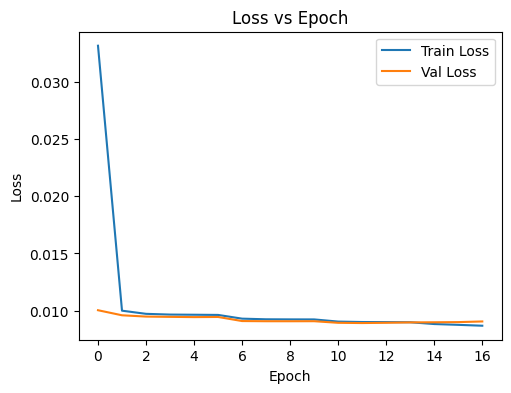

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

Visualisasi Loss Selama Training ini menunjukkan perubahan nilai loss selama proses pelatihan model (training) dari epoch ke epoch. Garis biru mewakili train loss (kesalahan pada data latih), dan garis oranye menunjukkan val loss (kesalahan pada data validasi).

Terlihat bahwa pada awal pelatihan (epoch 0 ke 1), nilai train loss turun drastis, lalu mulai stabil setelahnya. Nilai val loss juga cukup stabil dan rendah sejak awal. Ini menandakan bahwa model belajar dengan cepat di awal dan kemudian mampu menjaga performa yang baik tanpa overfitting. Karena nilai train loss dan val loss sama-sama kecil dan mendekati, ini menunjukkan bahwa model bekerja dengan baik dan konsisten pada data pelatihan maupun data validasi.

#### Visualisasi MAE Selama Training
Plot ini memperlihatkan **MAE (Mean Absolute Error)** per epoch pada data pelatihan dan validasi.

* Membantu memahami apakah **prediksi semakin membaik** seiring bertambahnya epoch.
* Disandingkan dengan plot loss agar bisa dilihat konsistensi performa model.

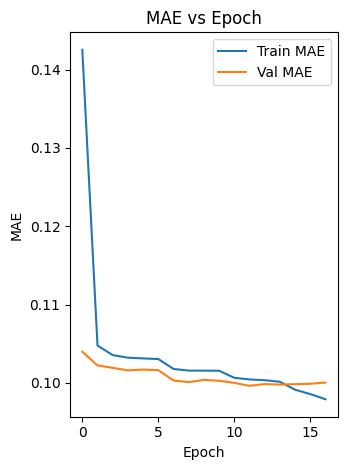

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE vs Epoch')
plt.legend()

plt.tight_layout()
plt.show()

Visualisasi MAE Selama Training ini menunjukkan perubahan nilai MAE (Mean Absolute Error) selama proses pelatihan model. Garis biru menunjukkan train MAE (kesalahan rata-rata pada data latih), sedangkan garis oranye menunjukkan val MAE (kesalahan rata-rata pada data validasi).

Dari grafik terlihat bahwa MAE menurun tajam di awal (dari epoch 0 ke 1), lalu terus menurun secara perlahan dan stabil seiring bertambahnya epoch. Nilai train MAE dan val MAE saling berdekatan dan sama-sama rendah, yang berarti model belajar dengan baik dan konsisten, serta tidak mengalami overfitting. Kesalahan prediksi model semakin kecil dari waktu ke waktu, baik pada data latih maupun validasi. Ini menandakan bahwa model cukup akurat dan dapat diandalkan.









#### Visualisasi Scatter Plot Prediksi vs Aktual
Visualisasi ini menunjukkan seberapa **dekat prediksi model** terhadap nilai aktual:

* Titik-titik di **garis merah putus-putus (Perfect Prediction)** menunjukkan prediksi sempurna.
* Penyebaran titik menggambarkan akurasi dan **deviasi kesalahan model**.

Cocok untuk memvisualisasikan model regresi seperti ini dalam sistem rekomendasi.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


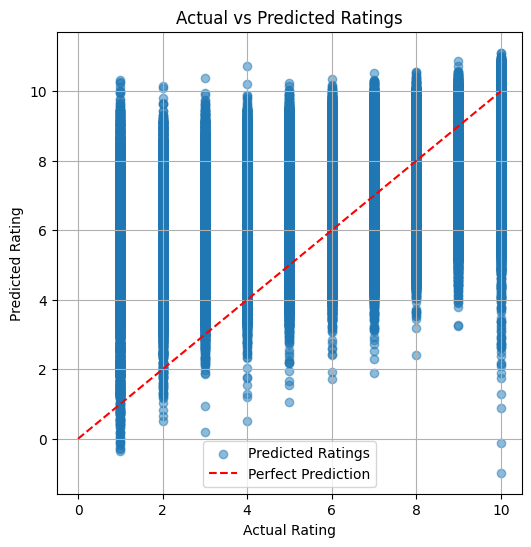

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred_rescaled, alpha=0.5, label='Predicted Ratings')
plt.plot([0, 10], [0, 10], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()

Visualisasi Actual vs Predicted Ratings ini menunjukkan seberapa akurat model dalam memprediksi rating dibandingkan dengan nilai rating yang sebenarnya. Setiap titik biru pada grafik mewakili satu data, misalnya satu ulasan dari pengguna, dengan sumbu horizontal menunjukkan rating yang sebenarnya (Actual Rating), dan sumbu vertikal menunjukkan rating yang diprediksi oleh model (Predicted Rating).

Garis merah putus-putus adalah garis prediksi sempurna, di mana nilai prediksi sama persis dengan nilai aktual. Jika model sangat akurat, maka semua titik akan berada di sepanjang garis ini. Namun, dari grafik terlihat bahwa banyak titik berada di atas garis merah ketika nilai aktual rendah, artinya model sering memberikan rating yang lebih tinggi dari sebenarnya (overestimate). Sebaliknya, saat nilai aktual tinggi, banyak titik berada di bawah garis, menunjukkan model sering memprediksi lebih rendah dari nilai sebenarnya (underestimate).

Sebagai contoh, ketika nilai rating sebenarnya adalah 2, banyak prediksi model mendekati 7 atau lebih, dan ketika rating sebenarnya adalah 9 atau 10, model kadang memprediksi hanya 6 atau 7. Ini menunjukkan bahwa model belum cukup akurat dan cenderung bias ke arah nilai tengah. Untuk meningkatkan akurasi, model dapat ditingkatkan dengan teknik tuning atau menggunakan data pelatihan yang lebih seimbang.

## Rekomendasi untuk User


#### Fungsi Rekomendasi Berdasarkan User ID
Fungsi `recommend_anime_for_user` digunakan untuk merekomendasikan beberapa anime terbaik (default 5) kepada pengguna berdasarkan model yang telah dilatih. Fungsi ini pertama memeriksa apakah user ID yang diberikan ada dalam data. Jika tidak ditemukan, maka fungsi berhenti. Jika ditemukan, fungsi akan:

* Mengubah user ID ke format angka (encoded).
* Membuat prediksi rating semua anime untuk user tersebut.
* Mengambil anime dengan prediksi tertinggi.
* Mengembalikan nama, genre, dan rating dari anime yang direkomendasikan.

Fungsi ini hanya menampilkan anime yang **belum pernah ditonton pengguna**, tetapi kemungkinan besar akan disukai.

In [ ]:
def recommend_anime_for_user(original_user_id, top_n=5):
    if original_user_id not in rating['user_id'].values:
        print(f"User ID {original_user_id} tidak ditemukan dalam data.")
        return None

    encoded_user_id = rating[rating['user_id'] == original_user_id]['user_index'].values[0]

    all_anime_ids = np.arange(num_anime)

    user_input = np.full_like(all_anime_ids, encoded_user_id)
    user_input = user_input.astype(np.int32)
    all_anime_ids = all_anime_ids.astype(np.int32)

    predictions = model.predict([user_input, all_anime_ids], verbose=0)

    top_indices = predictions.reshape(-1).argsort()[-top_n:][::-1]
    recommended_encoded_ids = all_anime_ids[top_indices]

    recommended_ids = [anime_encoder.inverse_transform([i])[0] for i in recommended_encoded_ids]

    return anime[anime['anime_id'].isin(recommended_ids)][['name', 'genre', 'rating']]

#### Melihat Rating dari Pengguna
Kode `print(rating[rating['user_id'] == 12345])` digunakan untuk menampilkan semua anime yang telah diberi rating oleh pengguna dengan ID 12345. Ini berguna untuk melihat selera atau histori menonton pengguna.


In [ ]:
print(rating[rating['user_id'] == 12345])

         user_id  anime_id  rating   user  anime  user_index  anime_index  \
1302174    12345         1      10  11695   1031       11695            0   
1302175    12345        30      10  11695    100       11695           19   
1302176    12345        33      10  11695   1483       11695           22   
1302177    12345        47      10  11695    102       11695           27   
1302178    12345      2001       8  11695    870       11695         1814   
1302179    12345      5114       8  11695     32       11695         3936   

         norm_rating  
1302174     1.000000  
1302175     1.000000  
1302176     1.000000  
1302177     1.000000  
1302178     0.777778  
1302179     0.777778  


#### Menampilkan Daftar User ID Terurut
Kode `print(user_encoder.classes_)` akan menampilkan daftar semua user ID yang telah diubah ke format angka menggunakan `LabelEncoder`. Ini membantu untuk melihat urutan pengkodean user dari awal, biasanya digunakan saat ingin mengetahui ID sebenarnya dari suatu indeks.


In [ ]:
print(user_encoder.classes_)

[    1     2     3 ... 73514 73515 73516]


#### Menampilkan Rekomendasi Anime untuk User
Kode `print(recommend_anime_for_user(12345))` digunakan untuk menampilkan hasil rekomendasi anime untuk user 12345. Hasil yang ditampilkan berupa tabel kecil yang menunjukkan nama anime, genre, dan rating.


In [ ]:
print(recommend_anime_for_user(12345))

                               name  \
0                    kimi no na wa.   
1  fullmetal alchemist: brotherhood   
2                          gintama°   
3                       steins;gate   
7              ginga eiyuu densetsu   

                                               genre  rating  
0                  drama,romance,school,supernatural    9.37  
1  action,adventure,drama,fantasy,magic,military,...    9.26  
2  action,comedy,historical,parody,samurai,sci-fi...    9.25  
3                                    sci-fi,thriller    9.17  
7                        drama,military,sci-fi,space    9.11  


## Prediksi Rating Spesifik

#### Fungsi Prediksi Rating Anime oleh Pengguna
Fungsi `predict_user_rating` bertujuan untuk memprediksi nilai rating yang akan diberikan oleh seorang pengguna terhadap sebuah anime tertentu. Fungsi ini dirancang sebagai bagian dari sistem rekomendasi berbasis pembelajaran mesin, khususnya *collaborative filtering* dengan pendekatan *embedding* neural network. Prediksi yang dihasilkan berada dalam skala rating yang telah ditentukan (misalnya 1–10), dan merupakan hasil dari model yang telah dilatih sebelumnya berdasarkan data interaksi user-anime.

In [ ]:
def predict_user_rating(user_id, anime_id):
    if user_id not in user_to_encoded:
        print(f"User ID {user_id} tidak ditemukan, menggunakan user ID pertama yang valid.")
        user_id = next(iter(user_to_encoded))

    if anime_id not in anime_to_encoded:
        print(f"Anime ID {anime_id} tidak ditemukan, menggunakan anime ID pertama yang valid.")
        anime_id = next(iter(anime_to_encoded))

    user_enc = user_to_encoded[user_id]
    anime_enc = anime_to_encoded[anime_id]

    user_input = np.expand_dims(user_enc, axis=0)
    anime_input = np.expand_dims(anime_enc, axis=0)

    pred = model.predict([user_input, anime_input], verbose=0).flatten()[0]
    pred_actual = pred * (max_rating - min_rating) + min_rating
    return f"Prediksi rating user {user_id} terhadap anime {anime_id}: {pred_actual:.2f}"


#### Contoh Penggunaan
Untuk menguji fungsi, digunakan perintah `print(predict_user_rating(12345, 5114))`. Perintah ini akan mengeksekusi prediksi terhadap kombinasi user dan anime tertentu, dan mencetak hasilnya di layar. Ini sangat berguna untuk validasi hasil model secara manual maupun untuk demonstrasi kepada pengguna.

In [ ]:
print(predict_user_rating(12345, 5114))

Prediksi rating user 12345 terhadap anime 5114: 7.28
